In [1]:
from PIL import Image
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def get_class(x):
    return str(x.parent).split("/")[-1]

A continuación modifico la importación de datos ya que lo estoy trabajando desde google colab:

In [6]:
# Montar Colab:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importo librerías:from pathlib import Path
import pandas as pd
from PIL import Image

In [10]:
# Ajusto el path como está en mi Drive
data_dir = Path("/content/drive/MyDrive/Colab Notebooks/Certificación Profesional en Deep Learning (ITBA)/3. Deep Learning/Entrega Skin Dataset Classification/skin-dataset-classification-main/data/Split_smol/train")

def get_class(x: Path):
    # La clase es el nombre de la carpeta padre (train/<clase>/imagen.jpg)
    return x.parent.name

files = []
for x in data_dir.rglob("*"):
    if x.is_file():
        with Image.open(x) as img:
            size = img.size  # (width, height)
        files.append((str(x), get_class(x), size))

df_train = pd.DataFrame(files, columns=["path", "class", "resolution"])
df_train.head()


,path,class,resolution
0,/content/drive/MyDrive/Colab Notebooks/Certifi...,Benign keratosis,"(1024, 764)"
1,/content/drive/MyDrive/Colab Notebooks/Certifi...,Benign keratosis,"(1024, 764)"
2,/content/drive/MyDrive/Colab Notebooks/Certifi...,Benign keratosis,"(1024, 764)"
3,/content/drive/MyDrive/Colab Notebooks/Certifi...,Benign keratosis,"(1024, 685)"
4,/content/drive/MyDrive/Colab Notebooks/Certifi...,Benign keratosis,"(1024, 683)"


In [11]:
# Lo mismo pero para el df de val
data_dir = Path("/content/drive/MyDrive/Colab Notebooks/Certificación Profesional en Deep Learning (ITBA)/3. Deep Learning/Entrega Skin Dataset Classification/skin-dataset-classification-main/data/Split_smol/val")

files = []
for x in data_dir.rglob("*"):
    if x.is_file():
        with Image.open(x) as img:
            size = img.size
        files.append((str(x), get_class(x), size))

df_val = pd.DataFrame(files, columns=["path", "class", "resolution"])
df_val.head()

,path,class,resolution
0,/content/drive/MyDrive/Colab Notebooks/Certifi...,Actinic keratosis,"(600, 450)"
1,/content/drive/MyDrive/Colab Notebooks/Certifi...,Actinic keratosis,"(600, 450)"
2,/content/drive/MyDrive/Colab Notebooks/Certifi...,Actinic keratosis,"(600, 450)"
3,/content/drive/MyDrive/Colab Notebooks/Certifi...,Actinic keratosis,"(600, 450)"
4,/content/drive/MyDrive/Colab Notebooks/Certifi...,Actinic keratosis,"(600, 450)"


Listo

In [9]:
# No lo utilizo porque cargué las df de forma diferente:
#data_dir = r'data/Split_smol/train/'
#p = Path(data_dir).glob('**/*')
#files = [(x, get_class(x), Image.open(x).size,Image.open(x)) for x in p if x.is_file()]
#df_train = pd.DataFrame(files, columns=["path", "class", "resolution","data"])

In [ ]:
# No lo utilizo porque cargué las df de forma diferente:
#data_dir = r'data/Split_smol/val/'
#p = Path(data_dir).glob('**/*')
#files = [(x, get_class(x), Image.open(x).size,Image.open(x)) for x in p if x.is_file()]
#df_val = pd.DataFrame(files, columns=["path", "class", "resolution", "data"])

<Axes: xlabel='resolution'>

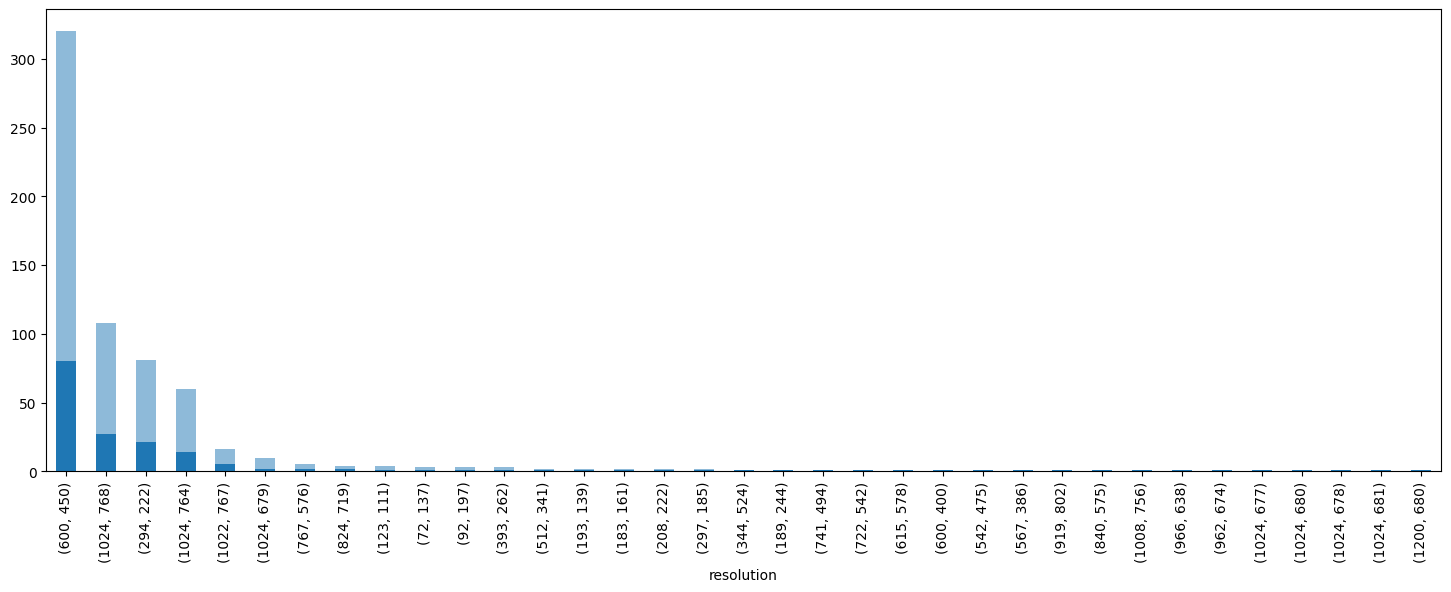

In [12]:
plt.figure(figsize=(18,6))
df_train.groupby("resolution").size().sort_values(ascending=False).plot.bar(alpha=0.5)
df_val.groupby("resolution").size().sort_values(ascending=False).plot.bar()

<Axes: xlabel='class'>

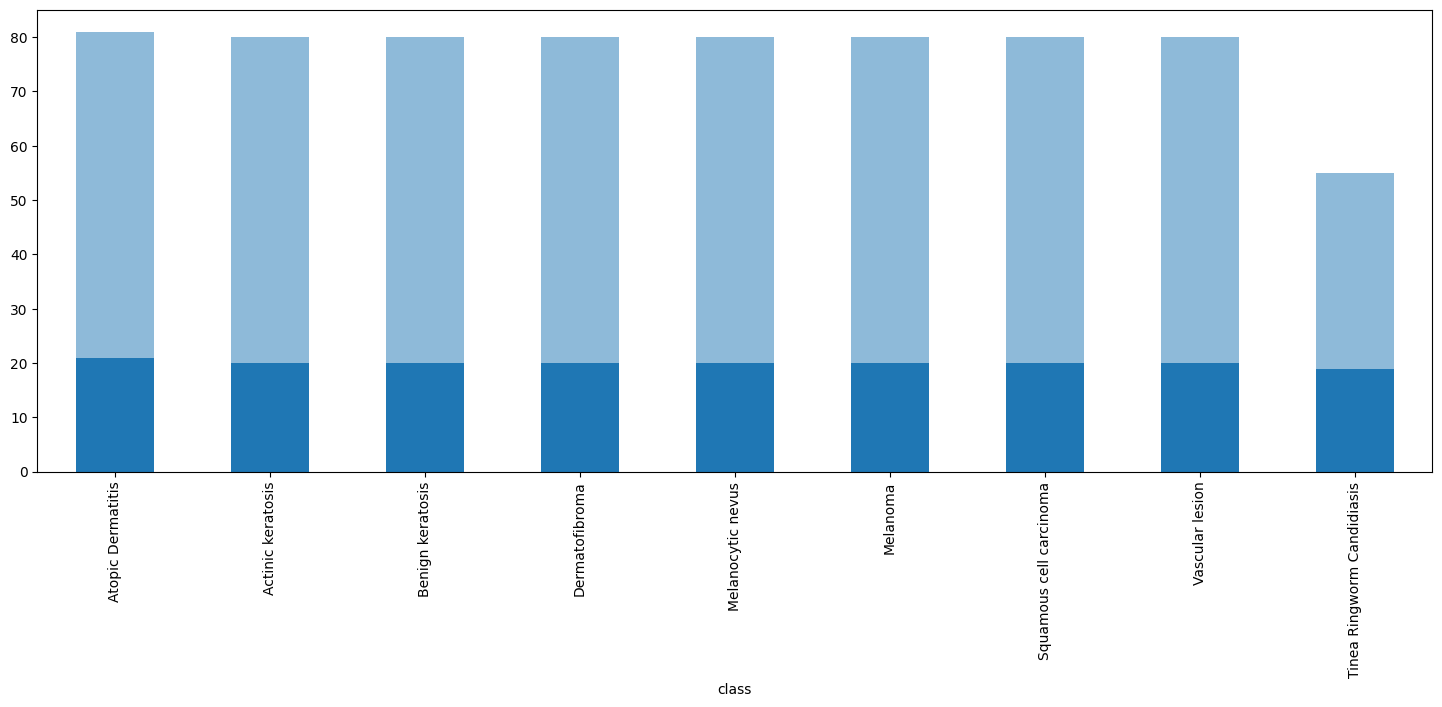

In [13]:
plt.figure(figsize=(18,6))
df_train.groupby("class").size().sort_values(ascending=False).plot.bar(alpha=0.5)
df_val.groupby("class").size().sort_values(ascending=False).plot.bar()

In [15]:
imgs = 5
classes = 9
fig, axes = plt.subplots(nrows=classes,ncols=imgs,figsize=(24,24))
fig.tight_layout()
aux_df = df_train.groupby("class").head(imgs)
for idx in range(classes*imgs):
    ax = plt.subplot(classes,imgs,idx+1)
    image_path = aux_df.path.iloc[idx]
    ax.imshow(Image.open(image_path))
    ax.set_title(aux_df["class"].iloc[idx])

Output hidden; open in https://colab.research.google.com to view.

In [17]:
imgs = 5
classes = 9
fig, axes = plt.subplots(nrows=classes,ncols=imgs,figsize=(24,24))
fig.tight_layout()
aux_df = df_val.groupby("class").head(imgs)
for idx in range(classes*imgs):
    ax = plt.subplot(classes,imgs,idx+1)
    image_path = aux_df.path.iloc[idx]
    ax.imshow(Image.open(image_path))
    ax.set_title(aux_df["class"].iloc[idx])

Output hidden; open in https://colab.research.google.com to view.